# Preprocessing the database and visualize the classes

In this Notebook we form the informations of the dataset and see which classes exist and each class how many items contain. The result is a valid CSV file with the nessessary informations.

In [1]:
# Import all packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
%matplotlib inline

In [8]:
sys.platform

'win32'

In [22]:
# chdir. it depends on the platform
if sys.platform == 'linux':
    # if os is linux cd to
    project_path = "/home/mate/develop/PycharmProjects/GeFace/"
else:
    project_path = "C:/Users/Lenovo/Documents/DL_hf/GeFace/"
    pass

print(project_path)

C:/Users/Lenovo/Documents/DL_hf/GeFace/


In [23]:
try:
    #print(os.getcwd())
    # Open CSV with all informations
    csv_file = pd.read_csv(project_path+"data/imdb.csv",delimiter = ';', encoding = "ISO-8859-1", engine='python')
    pd.set_option('display.max_columns', 100)
except (FileNotFoundError):
    print("CSV file not found")
    current_path = os.getcwd()
    print("Current path is " + current_path)

In [24]:
csv_file.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id
0,1899,1968,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,[1072.926 161.838 1214.784 303.696],1.459693,1.118973,6488
1,1899,1970,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,[477.184 100.352 622.592 245.76],2.543198,1.852008,6488
2,1899,1968,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,[114.969643089629 114.969643089629 451.6865723...,3.455579,2.985660,6488
3,1899,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,[622.885505642659 424.217503837008 844.3390076...,1.872117,NaN,6488
4,1899,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,[1013.85900236037 233.882042207585 1201.586127...,1.158766,NaN,6488


In [25]:
# Drop all unnessessary infos

df = csv_file.drop(columns=['name', 'face_location','face_score','second_face_score','celeb_id'])

In [26]:
# Calculate age

df['dob'] = df['photo_taken'] - df['dob']


In [27]:
# Create age column
df = df.drop(columns=['photo_taken'])
df = df.rename(index=str, columns={"dob": "age"})


In [28]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0


In [9]:
# Erase every invalid value
df = df.query('age >= 0 and age <=100')

In [10]:
try:
    # Write CSV back for laterer use
    df.to_csv("data/dataset.csv",sep = ';')
except(FileNotFoundError):
    print("Couldnt write datas do csv file")
    print(os.getcwd())

# Visualization of classes

In [11]:
# Import packages for counting and plotting the histogram
from collections import Counter

In [12]:
ages = df['age']
age_counts = Counter(ages)

In [13]:
# Sort ages in increasing order from 0 to 100
df_plot = pd.Series(age_counts).sort_index()
df_plot

0         47
1         65
2        221
3         71
4         58
5        145
6        226
7        283
8        567
9        809
10       932
11      1448
12      1642
13      2178
14      2253
15      2268
16      2835
17      3395
18      3667
19      5045
20      7107
21      8071
22      8202
23     10051
24     10031
25     12916
26     11325
27     14330
28     12622
29     15309
       ...  
71       977
72       963
73       685
74       652
75       558
76       655
77       558
78       450
79       439
80       321
81       313
82       257
83       159
84       211
85       133
86        97
87       118
88        97
89        34
90        56
91        42
92        13
93        14
94        24
95         4
96        15
97        11
98         1
99         3
100        4
Length: 101, dtype: int64

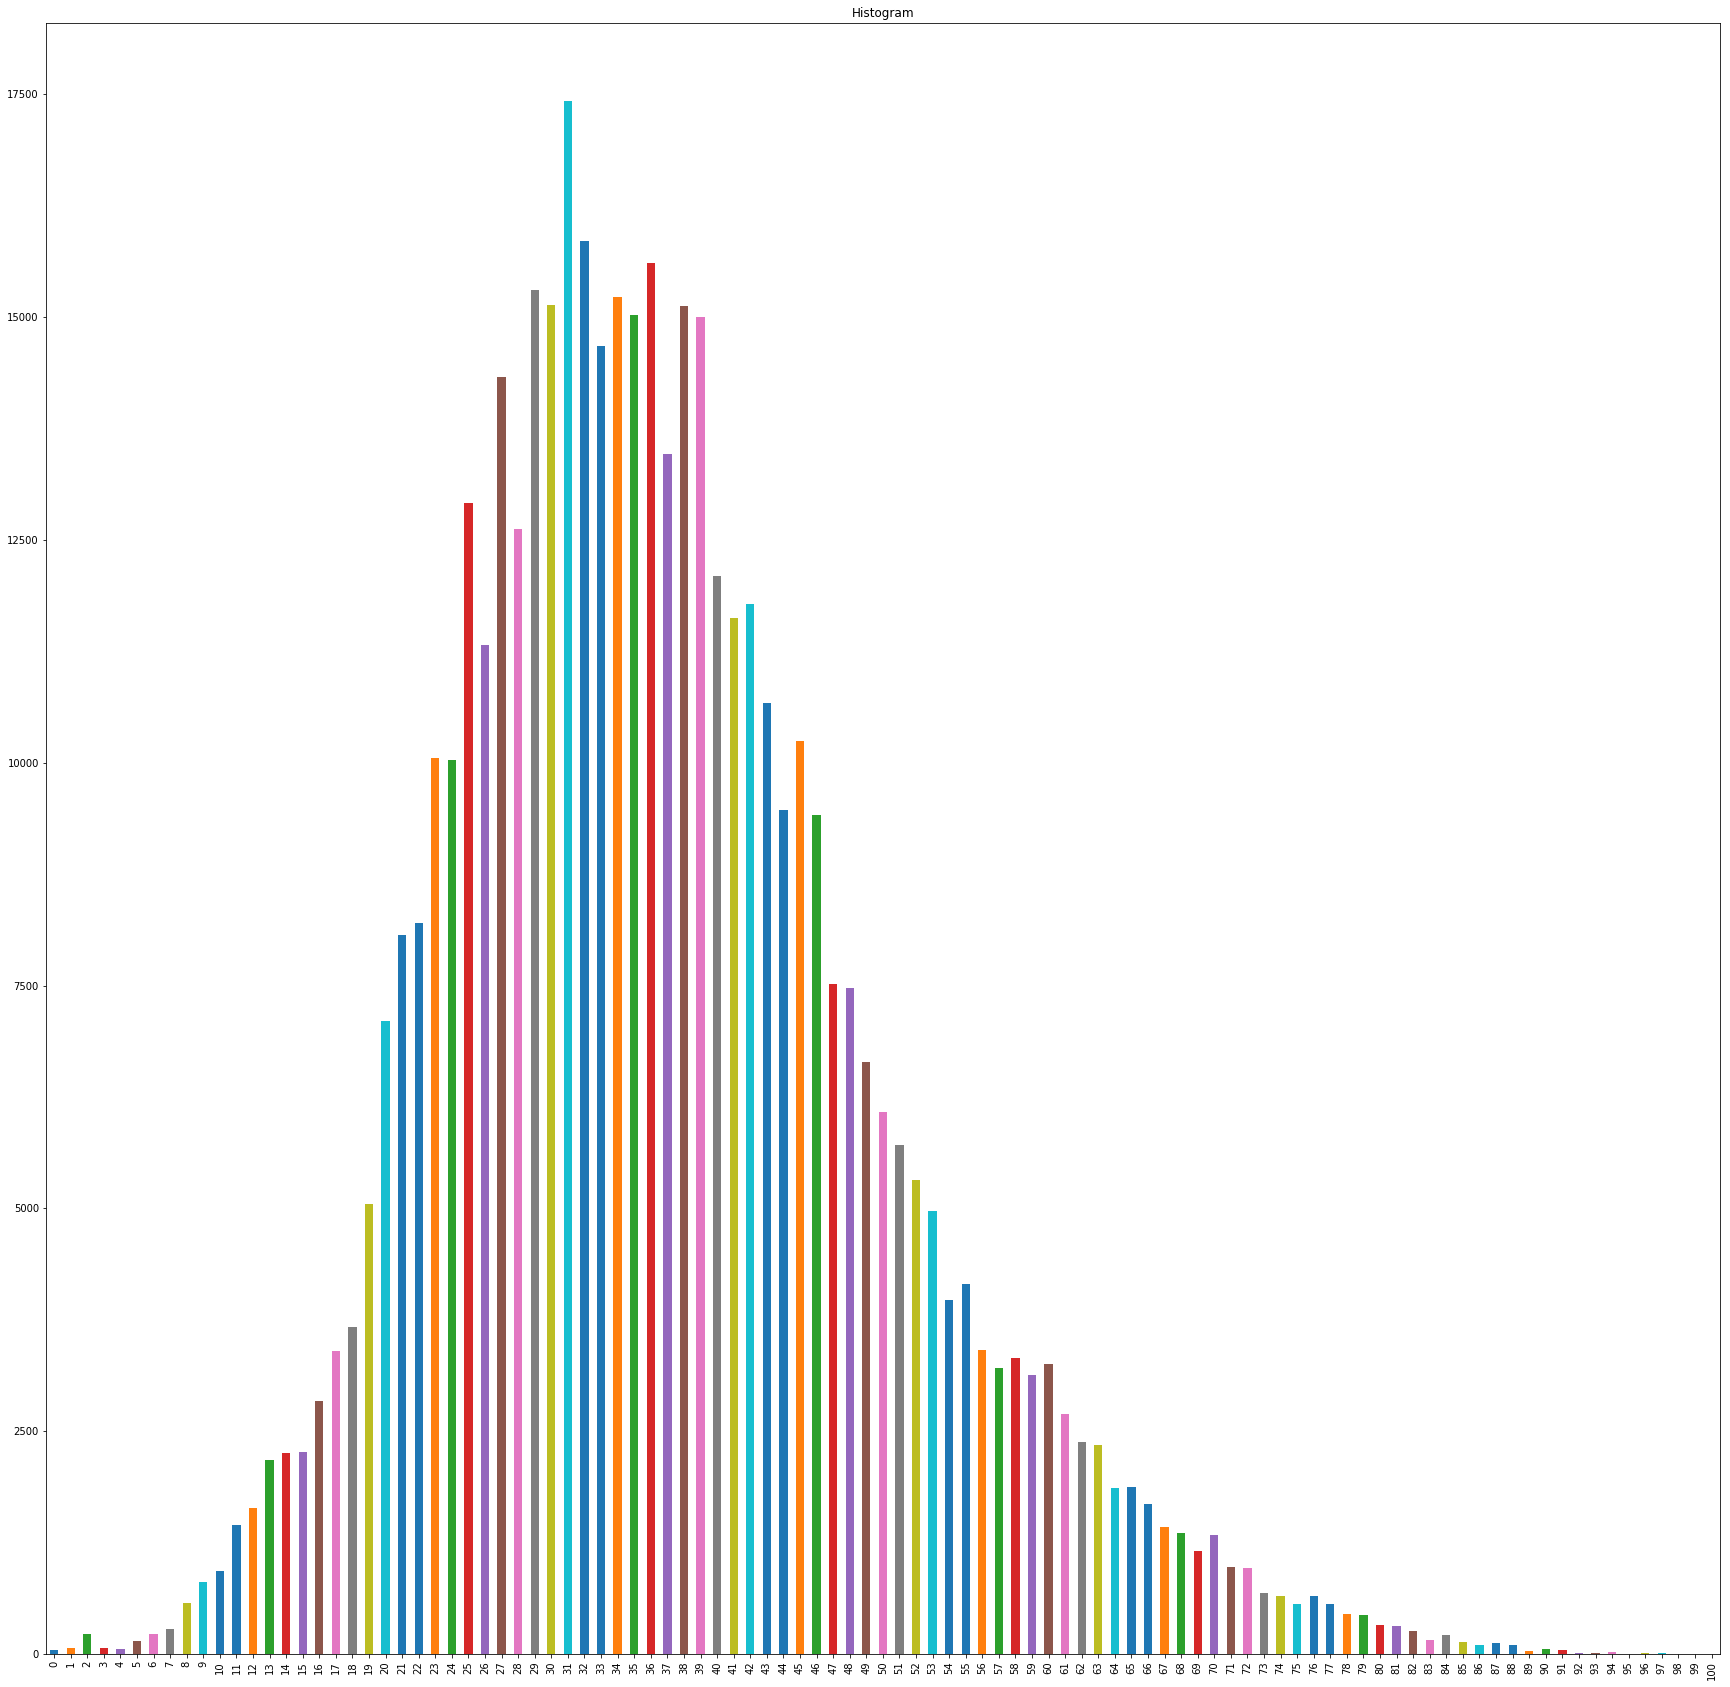

In [14]:
# Plot classes
df_plot.plot(kind = 'bar',figsize=(30,30), title='Histogram')

## Resize images to 128x128
* Get all the paths of the images from the csv file.
* create the same structure of directory
* open images with opencv
* resize them
* save in the new directory

In [15]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0


In [18]:
image_paths = df.drop(columns=["age", "gender"])
image_paths = image_paths.values
df.shape

(460070, 3)

# ÖRKI NE FUTTASD

In [ ]:
# create directory structure
try:
    os.mkdir("faces")
    for i in range(100):
        if i < 10:
            os.mkdir("faces/0" + str(i))
        else:
            os.mkdir("faces/" + str(i))
except(FileExistsError):
    pass

# detect faces
# load detector
face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('detector/haarcascade_eye.xml')

min_area = 64 * 64

# open, resize, save
i = 0
skipp_cntr = 0
for path in image_paths:
    path = path[0]
       
    img = cv2.imread("imdb_crop/" + path)
    if img is None:
        continue
    area = img.shape[0] * img.shape[1]
   # print("{}  {}".format(area, path))
    
    # if picture is too small then skipp
    if area >= min_area:
    #res = cv2.resize(img,(128, 128), interpolation=cv2.INTER_CUBIC)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
   
        if faces == () :
            skipp_cntr += 1
            df = df[df.full_path != path]
        else:
            bb = []
            k = 0
            for (x,y,w,h) in faces:
                bb.append([w * h, k])
                k += 1    
#                 print("\t\t{}  {}  {}".format(i, area, path))
#                 roi_color = img[y:y+h, x:x+w]
#                 cv2.imwrite("faces/" + path, roi_color)
                
            bb.sort(reverse=True)
            idx = bb[0][1]
            (x,y,w,h) = faces[idx]
            roi_color = img[y:y+h, x:x+w]
            cv2.imwrite("faces/" + path, roi_color)
            
            if i % 100:
                print(i)
            i += 1
#             if i == 100:
#                 break
    else:
        skipp_cntr += 1
    
print("skipped",skipp_cntr)
df.to_csv("meta/faces.csv")

# ÖRKI INNEN MEHET

In [40]:
df2 = pd.read_csv(project_path+"meta/faces.csv",delimiter = ',', engine='python',index_col=0)
df2.head()
print(df2.shape)
df = df2

(261523, 3)


In [41]:
image_paths = df['full_path'].values

In [42]:
from pathlib import Path
i = 0

In [43]:
for path in image_paths:
    full = project_path+"faces/"+path
    file = Path(full)
    if file.is_file():
        continue
    else:
        df = df[df.full_path != path]
        i += 1
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [46]:
print(df.shape)
df.to_csv(project_path+"meta/faces_correct.csv")

(260593, 3)


In [55]:
dataset = pd.read_csv(project_path+"meta/faces_correct.csv",delimiter = ',', engine='python',index_col=0)

In [60]:
image_paths = dataset['full_path'].values
image_paths

array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg',
       '01/nm0000001_rm3343756032_1899-5-10_1970.jpg',
       '01/nm0000001_rm577153792_1899-5-10_1968.jpg', ...,
       '08/nm3994408_rm744468480_1989-12-29_2011.jpg',
       '08/nm3994408_rm761245696_1989-12-29_2011.jpg',
       '08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype=object)

In [79]:
img = cv2.imread(project_path+"faces/"+image_paths[250001])

In [80]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

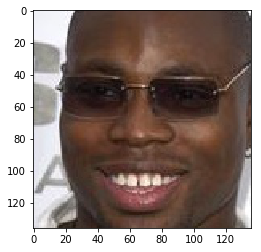

In [81]:
plt.imshow(rgb)

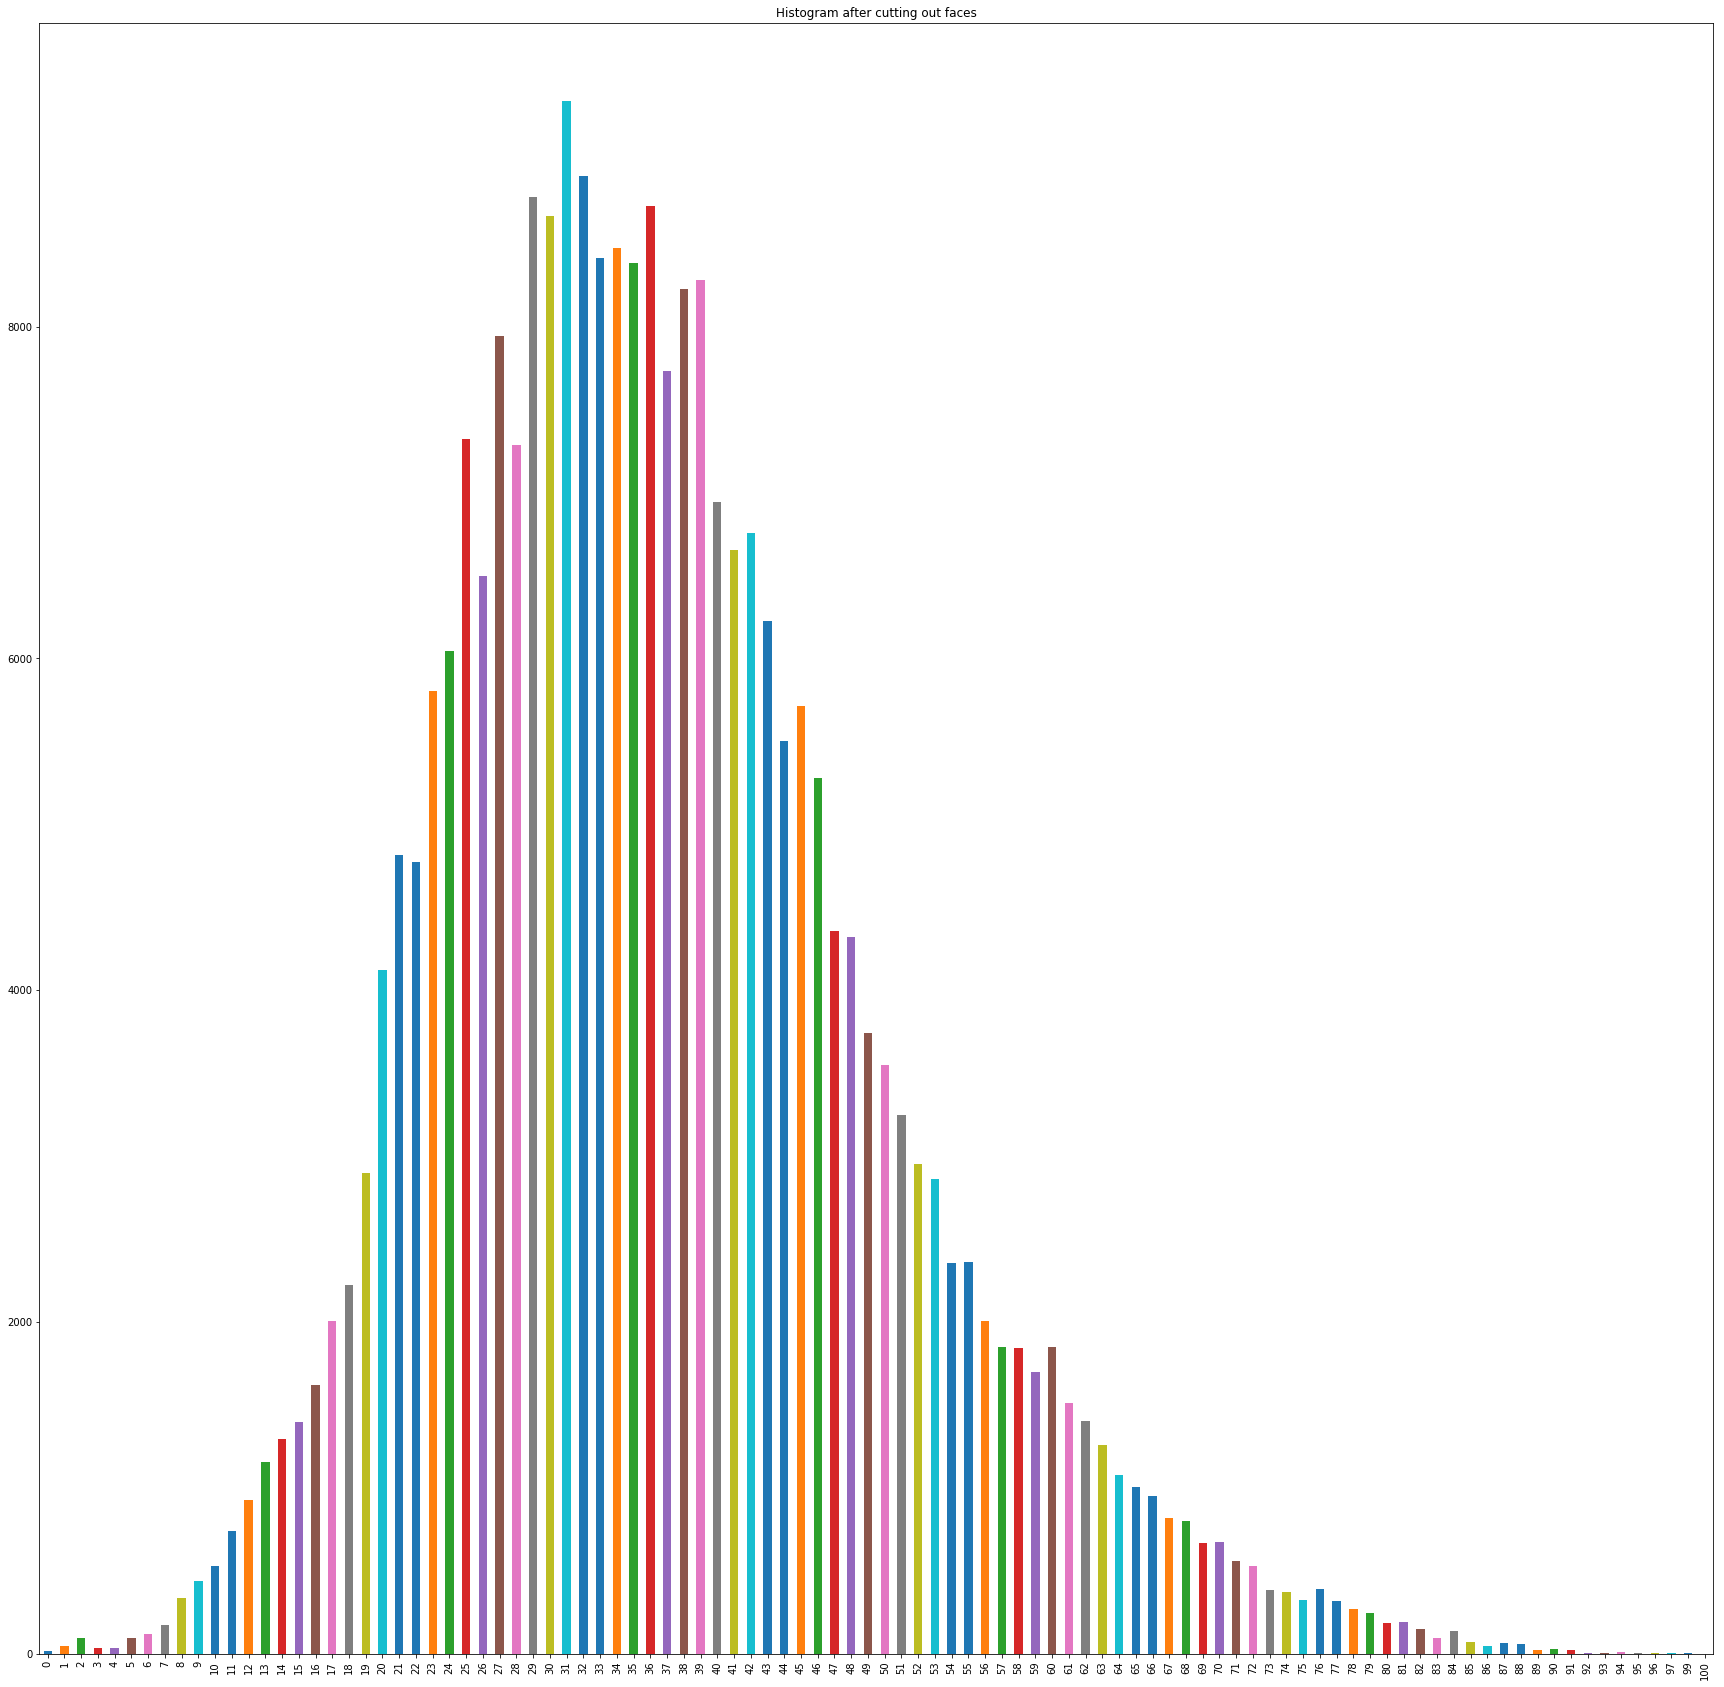

In [67]:
# lets see the new dataset
ages = df['age']
age_counts = Counter(ages)
# Sort ages in increasing order from 0 to 100
df_plot = pd.Series(age_counts).sort_index()
# Plot classes
df_plot.plot(kind = 'bar',figsize=(30,30), title='Histogram after cutting out faces')

# Shuffle dataset and create train, valid, test datas

In [22]:
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Randomize but always the same random numbers

np.random.seed(42)
random.seed(42)

## Before shuffle

In [23]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
5,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,0.0
6,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0


In [24]:
# shuffle the rows
df = shuffle(df)

## After shuffle

In [25]:
df.head()

,age,full_path,gender
412667,20,84/nm1086384_rm1097308928_1985-7-27_2005.jpg,1.0
25551,45,90/nm0000190_rm198101504_1969-11-4_2014.jpg,1.0
31158,47,11/nm0000211_rm4256215040_1956-1-27_2003.jpg,0.0
77770,65,58/nm0000658_rm1928118528_1949-6-22_2014.jpg,0.0
301741,31,32/nm0048932_rm3576208128_1969-7-30_2000.jpg,1.0


In [26]:
# calculate test train valid data numbers
test_num = int(np.floor(0.1 * df.shape[0]))
valid_num = int(np.floor(0.2 * df.shape[0]))
train_num = int(df.shape[0] - test_num - valid_num)
print("train: {} | valid: {} | test: {}".format(train_num, valid_num, test_num))

train: 183067 | valid: 52304 | test: 26152


In [27]:
# split the data into train valid and test data
train_data = df.iloc[0:train_num,:]
train_data.shape

(183067, 3)

In [28]:
valid_data = df.iloc[train_num:train_num + valid_num, :]
valid_data.shape

(52304, 3)

In [29]:
test_data = df.iloc[ train_num+valid_num:,:]
test_data.shape

(26152, 3)

In [30]:
image_path = "/faces/"
x_train_p = image_path + train_data['full_path'].values
x_valid_p = image_path + valid_data['full_path'].values
x_test_p = image_path + test_data['full_path'].values
x_test_p.shape

(26152,)

In [31]:
# get the ages
y_train = train_data['age'].values
y_valid = valid_data['age'].values
y_test = test_data['age'].values

# MOST NEM KELL EZ ÖRKI

1
2


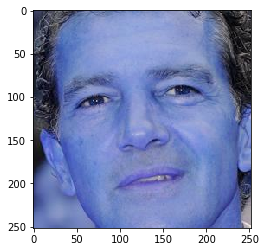

In [85]:
# detect faces
# load detector
face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('detector/haarcascade_eye.xml')

min_area = 64*64

# open, resize, save
img = cv2.imread("imdb_crop/04/nm0000104_rm2092810240_1960-8-10_2014.jpg")
area = img.shape[0] * img.shape[1]

# if picture is too small then skipp
if area > min_area:

    #res = cv2.resize(img,(128, 128), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    # if face is too small then skipp
    #     if (w * h) <  (0.25 * area):
    #         skipp_cntr += 1
    #         continue
#     x -= 10
#     y -= 10
#     w += 20
#     h += 20
    bb = []
    i = 0
    for (x,y,w,h) in faces:
        bb.append([w * h, i])
        #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     #   roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        i += 1
        print(i)
#     cv2.imshow("faces/"+path, roi_color)
#         plt.figure()
#         plt.imshow(roi_color)
    bb.sort(reverse=True)
    idx = bb[0][1]
    (x,y,w,h) = faces[idx]
    roi_color = img[y:y+h, x:x+w]
    plt.imshow(roi_color)

In [80]:
faces

array([[109,  97, 252, 252],
       [382,  55, 117, 117]], dtype=int32)

In [81]:
bb

[[63504, 0], [13689, 1]]

In [82]:
bb.sort(reverse=True)

In [83]:
bb

[[63504, 0], [13689, 1]]